## Initialization

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [3]:
import pandas as pd
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
labels = pd.read_csv('/datasets/faces/labels.csv')

labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [3]:
# Check for NaN values
nan_check = labels.isna().sum()

# Print the result
print("Count of NaN values in each column:")
print(nan_check)

Count of NaN values in each column:
file_name    0
real_age     0
dtype: int64


In [6]:
# Specify the directory you want to check
directory_path = '/datasets/faces/final_files/'

# Count all files in the specified path
file_count = len([file for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))])

print(f"Number of files: {file_count}")

Number of files: 7591


## EDA

In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


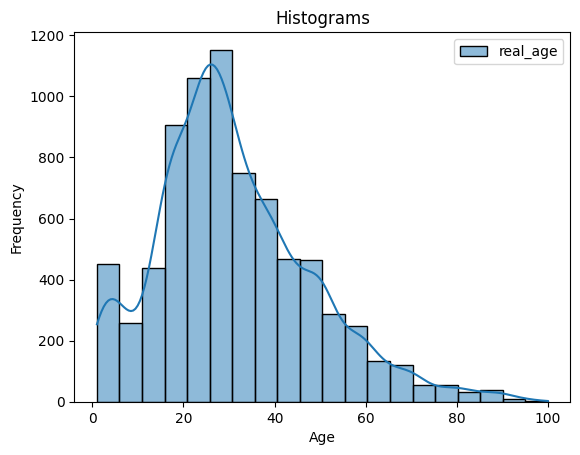

In [6]:
# Create a histogram
sns.histplot(labels, bins=20, kde=True)  # kde=True adds a kernel density estimate

# Add titles and labels
plt.title('Histograms')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [7]:
directory_path = '/datasets/faces/final_files/'

print(os.listdir(directory_path))

['006902.jpg', '003356.jpg', '002627.jpg', '004085.jpg', '005138.jpg', '004409.jpg', '000845.jpg', '001574.jpg', '003518.jpg', '004247.jpg', '000683.jpg', '006029.jpg', '002465.jpg', '006740.jpg', '003194.jpg', '001736.jpg', '003437.jpg', '002708.jpg', '004166.jpg', '005219.jpg', '002384.jpg', '005930.jpg', '000926.jpg', '001655.jpg', '005057.jpg', '004328.jpg', '000764.jpg', '001493.jpg', '002546.jpg', '007550.jpg', '003275.jpg', '006821.jpg', '001817.jpg', '001970.jpg', '005534.jpg', '004805.jpg', '001259.jpg', '006263.jpg', '003752.jpg', '004481.jpg', '007316.jpg', '003590.jpg', '002861.jpg', '007154.jpg', '006425.jpg', '003914.jpg', '000368.jpg', '005372.jpg', '004643.jpg', '001097.jpg', '002780.jpg', '002069.jpg', '005615.jpg', '006344.jpg', '000287.jpg', '003833.jpg', '005291.jpg', '004562.jpg', '003671.jpg', '002942.jpg', '007235.jpg', '006506.jpg', '000449.jpg', '005453.jpg', '001178.jpg', '004724.jpg', '006182.jpg', '002663.jpg', '001934.jpg', '003392.jpg', '006227.jpg', '0044

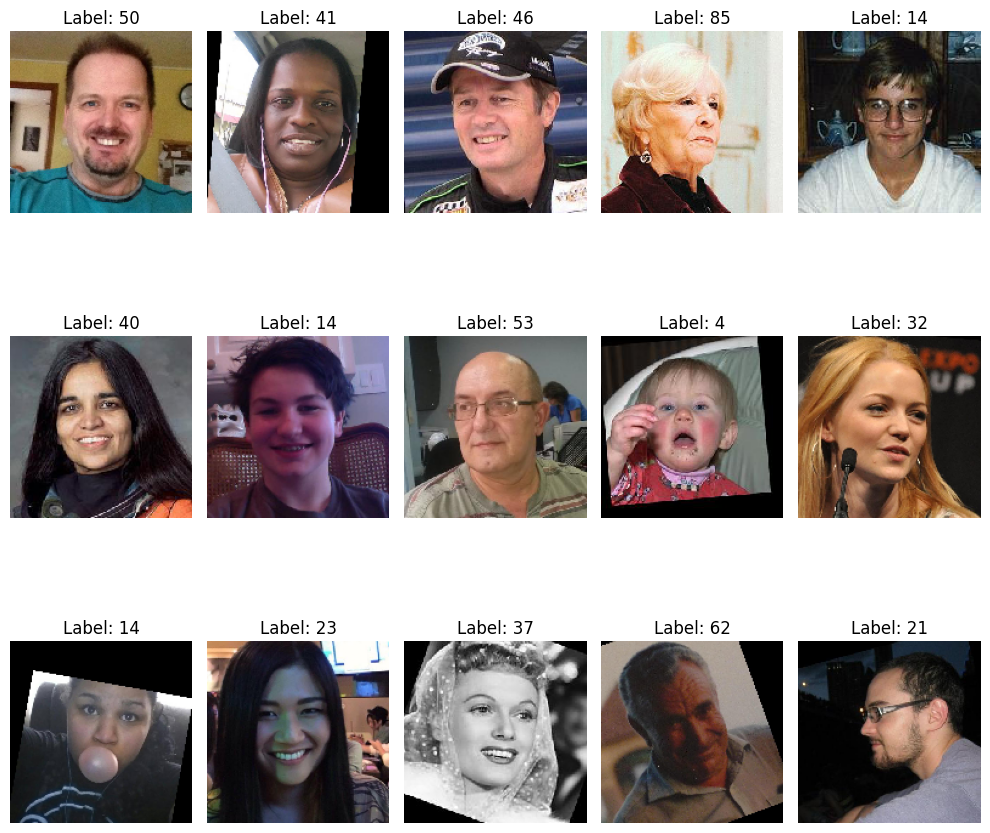

In [5]:
# Define the base directory where images are stored
base_directory = '/datasets/faces/final_files/'

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# Randomly select 15 images from the DataFrame
sampled_labels = labels.sample(n=15, random_state=12345)  # Ensure reproducibility

# Create a figure to display the images
fig = plt.figure(figsize=(10, 10))

for i, row in enumerate(sampled_labels.iterrows()):
    # Extract the image filename and class label
    image_file = row[1]['file_name']  # Adjust based on your column name
    class_label = row[1]['real_age']     # Adjust based on your column name

    # Load the image
    img_path = os.path.join(base_directory, image_file)
    img = load_img(img_path, target_size=(150, 150))  # Resize as needed
    img_array = img_to_array(img)  # Convert to array
    img_array = img_array / 255.0   # Normalize the image

    # Add image to the figure
    ax = fig.add_subplot(3, 5, i + 1)  # 3 rows, 5 columns
    ax.imshow(img_array)
    ax.set_title(f"Label: {class_label}")
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

### Findings

**Findings:** The findings are that in this file of photos of faces, a majority of the ages are between 20 and 35. The dataset is also right, positive skew also meaning that parametric statistical tests would not work.

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [6]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
def load_train(path):
    
    train_datagen_flow = train_datagen.flow_from_directory(
    '/datsets/faces/final_files/',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = None,
    subset = 'training',
    seed = 12345
    )

    return train_gen_flow

In [8]:
def load_test(path):
    
    test_datagen_flow = test_datagen.flow_from_directory(
    '/datasets/faces/final_files',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = None,
    subset = "test",
    seed = 12345
    )

    return test_gen_flow

In [9]:
def create_model(input_shape):
    
    model = keras.models.Sequential()
    
    return model

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    
    return model

### Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [ ]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

## Conclusions

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training